$$ \bf{EE0404\ SIGNAL\ PROCESSING\ APPLICATIONS} $$
$$ \ $$
$$ Lecture\ Notes $$
$$ Lecture\ 2 $$
$$ Discrete\ Fourier\ Transform\ - PART\ 1 $$
$$ July\ 2016 $$

# Discrete Fourier Transform
- Euler Formula
- Basis functions
- Real frequencies of basis functions
- Frequency resolution


In [1]:
%pylab inline

def pol2cart(r,theta):
    return r*cos(theta), r*sin(theta)

thetas = linspace(0,2*np.pi,100)
[xx, yy]= pol2cart(1,thetas)


Populating the interactive namespace from numpy and matplotlib


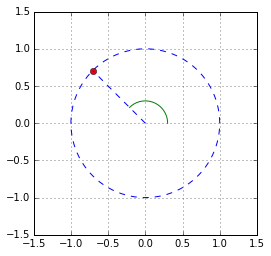

In [4]:
P = exp(1j*.75*np.pi)
arc_theta = linspace(0,.75*np.pi,20)
[arc_xx, arc_yy]= pol2cart(.3,arc_theta)

plot(xx,yy,'--')
axes().set_aspect('equal')
axis([-1.5 ,1.5, -1.5, 1.5 ])
grid(True)
hold(True)
plot(arc_xx,arc_yy)
plot(real(P),imag(P),'or')
plot([0,real(P)],[0, imag(P)],'--b')


# Question
Generate and plot cosine and sine functions that are sampled at fs=60 Hz and have a real frequency 3 Hz.

- Are there any missing parameters? 
- Duration? Let’s pick it as 60 samples (almost 1 second?).



# Oh dear, DFT!

$$ y(k) = \sum\limits_{n=0}^{M-1} x(n)\left(e^{j \frac{2\pi}{M}nk}\right)^*,\ \ \ k=\{0,1,...,M-1\} $$

$$ y(k) = \sum\limits_{n=0}^{M-1} x(n)e^{-j \frac{2\pi}{M}nk},\ \ \ k=\{0,1,...,M-1\}$$

$$ y(k) = \sum\limits_{n=0}^{M-1} x(n)\left[(\cos\left(e^{j \frac{2\pi}{M}nk}\right)-j\sin\left(e^{j \frac{2\pi}{M}nk}\right)\right] $$

$$ y(k) = \sum\limits_{n=0}^{M-1} x(n)\cos\left(e^{j \frac{2\pi}{M}nk}\right) - j\sum\limits_{n=0}^{M-1} x(n)\sin\left(e^{j \frac{2\pi}{M}nk}\right) $$

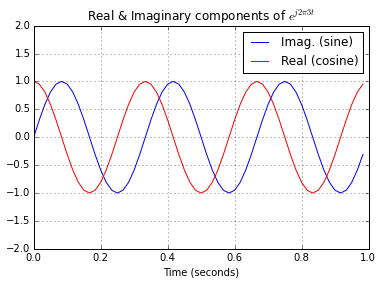

In [3]:
fs = 60.0
n = arange(fs)
fr = 3.0
t = n/fs
sin_x = sin(2*pi*fr*t)
cos_x = cos(2*pi*fr*t)
p1 = plot(t,sin_x);
hold(True);
p2 = plot(t,cos_x,'r');
grid(True);
ylim([-2,2]);
xlabel('Time (seconds)');
legend(('Imag. (sine)','Real (cosine)'))
title('Real & Imaginary components of $ e^{j 2\pi 3 t} $')